# changing_inputs

This Notebook loads an input file, changes the inputs and for each change runs the sap2012 model.

## Setup

In [1]:
%matplotlib inline
import sap2012
import matplotlib.pyplot as plt
s=sap2012.Sap2012()

## Read input file

In [2]:
fp='input_csv_file.csv'
s.read_input_csv(fp)

## Change input and run model

The original `area` input value is:

In [5]:
s.inputs['total_floor_area']

KeyError: 'total_floor_area'

Here this is changed to the three possible options below:

In [4]:
temperature_during_heating_living_room=[19,20,21,22,23]

For each area, the SAP model is run and the results stored in the `outputs` dictionary:

In [9]:
outputs={}
for i,a in enumerate(temperature_during_heating_living_room):
    s.inputs['temperature_during_heating_living_room']=a
    s.run()
    outputs['run%s' % str(i+1)]=s.outputs.copy() # needs copy otherwise the same object is placed in all dictionary items

## Plot results

In [10]:
total_energy_used=[v['total_energy_used'] for v in outputs.values()]
total_energy_used

[15268.839912667378,
 16942.857154434612,
 18642.133173649574,
 20363.73219184092,
 22102.94535558579]

In [11]:
total_CO2_emissions_yearlys=[v['total_CO2_emissions_yearly'] for v in outputs.values()]
total_CO2_emissions_yearlys

[3714.860702811012,
 4076.448427032735,
 4443.4920471831665,
 4815.357435112498,
 5191.027478481389]

Text(0, 0.5, 'total_energy_used')

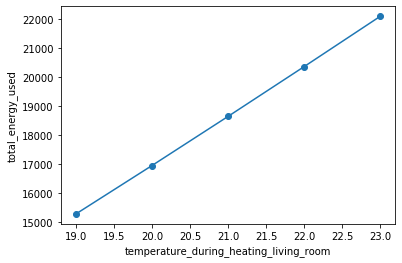

In [13]:
fig, ax = plt.subplots()  
ax.plot(temperature_during_heating_living_room, total_energy_used,'-o')
ax.set_xlabel('temperature_during_heating_living_room')
ax.set_ylabel('total_energy_used')